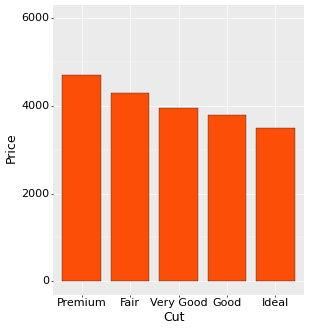

D:\0ilraypan\python_work\env\beautiful\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
D:\0ilraypan\python_work\env\beautiful\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.


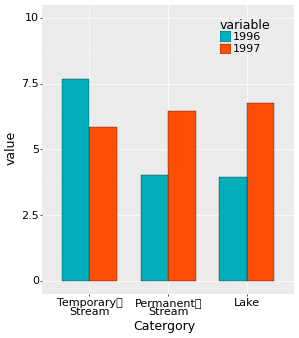

TypeError: astype() got an unexpected keyword argument 'categories'

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 18 11:13:35 2018

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""

import pandas as pd
import numpy as np
from plotnine import *
#from plotnine.data import *
#import matplotlib.pyplot as plt

#-----------------------(a)单数剧系列柱形图--------------------------------------------
mydata=pd.DataFrame({'Cut':["Fair","Good","Very Good","Premium","Ideal"],
                     'Price':[4300,3800,3950,4700,3500]})

Sort_data=mydata.sort_values(by='Price', ascending=False)

#Sort_data['Cut']=Sort_data['Cut'].astype("category",categories=Sort_data['Cut'],ordered=True)

Sort_data['Cut']=pd.Categorical(Sort_data['Cut'],ordered=True, categories=Sort_data['Cut'])

base_plot=(ggplot(Sort_data,aes('Cut','Price'))
+geom_bar(stat = "identity", width = 0.8,colour="black",size=0.25,fill="#FC4E07",alpha=1)
+ylim(0, 6000)
+theme(
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       aspect_ratio =1.15,
       figure_size = (6.5, 6.5),
       dpi = 50
       )
)
print(base_plot)
#base_plot.save('Bar_Plot.pdf')


#------------------------(b)双数剧系列柱形图---------------------------------------------

df=pd.read_csv('MultiColumn_Data.csv')
df=df.sort_values(by='1996', ascending=False)
mydata=pd.melt(df, id_vars='Catergory')

mydata['Catergory']=pd.Categorical(mydata['Catergory'],ordered=True, categories=df['Catergory'])


base_plot=(ggplot(mydata,aes(x='Catergory',y='value',fill='variable'))
+geom_bar(stat="identity", color="black", position='dodge',width=0.7,size=0.25)
+scale_fill_manual(values=["#00AFBB", "#FC4E07", "#E7B800"])
+ylim(0, 10)
+theme(legend_title=element_text(size=18,face="plain",color="black"),
       legend_text=element_text(size=16,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       legend_background=element_blank(),
       legend_position=(0.75,0.80),
       aspect_ratio =1.15,
       figure_size = (6.5, 6.5),
       dpi = 50
       )
)
print(base_plot)
#base_plot.save('Bar_Plot2.pdf')

#------------------------(c)堆积柱形图---------------------------------------------
df=pd.read_csv('StackedColumn_Data.csv')

Sum_df=df.iloc[:,1:].apply(lambda x: x.sum(), axis=0).sort_values(ascending=False)

meanRow_df=df.iloc[:,1:].apply(lambda x: x.mean(), axis=1)

Sing_df=df['Clarity'][meanRow_df.sort_values(ascending=True).index]

mydata=pd.melt(df,id_vars='Clarity')

mydata['variable']=mydata['variable'].astype("category",categories= Sum_df.index,ordered=True)
mydata['Clarity']=mydata['Clarity'].astype("category",categories= Sing_df,ordered=True)

base_plot=(ggplot(mydata,aes(x='variable',y='value',fill='Clarity'))
+geom_bar(stat="identity", color="black", position='stack',width=0.7,size=0.25)
+scale_fill_brewer(palette="YlOrRd")
+ylim(0, 15000)
+theme(
       legend_title=element_text(size=18,face="plain",color="black"),
       legend_text=element_text(size=16,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       legend_background=element_blank(),
       legend_position=(0.75,0.75),
       aspect_ratio =1.15,
       figure_size = (6.5, 6.5),
       dpi = 50
       )
)
print(base_plot)
#base_plot.save('Bar_Plot3.pdf')

#---------------------------------(d)百分比堆积柱形图------------------------------------------------
df=pd.read_csv('StackedColumn_Data.csv')

SumCol_df=df.iloc[:,1:].apply(lambda x: x.sum(), axis=0)

df.iloc[:,1:]=df.iloc[:,1:].apply(lambda x: x/SumCol_df, axis=1)

meanRow_df=df.iloc[:,1:].apply(lambda x: x.mean(), axis=1)

Per_df=df.iloc[meanRow_df.idxmax(),1:].sort_values(ascending=False)

Sing_df=df['Clarity'][meanRow_df.sort_values(ascending=True).index]

mydata=pd.melt(df,id_vars='Clarity')
mydata['Clarity']=mydata['Clarity'].astype("category",categories=Sing_df,ordered=True)
mydata['variable']=mydata['variable'].astype("category",categories= Per_df.index,ordered=True)


base_plot=(ggplot(mydata,aes(x='variable',y='value',fill='Clarity'))
+geom_bar(stat="identity", color="black", position='fill',width=0.7,size=0.25)
+scale_fill_brewer(palette="GnBu")
#+ylim(0, 10)
+theme(
       #text=element_text(size=15,face="plain",color="black"),
       legend_title=element_text(size=18,face="plain",color="black"),
       legend_text=element_text(size=16,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       aspect_ratio =1.15,
       figure_size = (6.5, 6.5),
       dpi = 50
       )
)
print(base_plot)
#base_plot.save('Bar_Plot4.pdf')